In [1]:
# Updating sample dataset to create the final patient survival dataset
# 1. Dropping the following fields:
    # - height and weight (because they are respresented in the bmi calculation)
    # - any numerical APACHE diagnosis (II, III, IV)
    # - ***unique ids (encounter and patient) will be removed from the final ML dataset
# 2. Dropping columns with more than 5000 missing values
# 3. Encoding 'object' values
# 4. Dropping patients with missing values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Bringing the patient survival datset into notebook
database_erd = pd.read_csv("Dataset.csv")

In [4]:
database_erd.head(10)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.56,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.45,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,50129,33,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,90749,118,0,50.0,25.71,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [5]:
database_erd.shape

(91713, 186)

In [6]:
# Looking at column names, non-null counts and datatypes
database_erd.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    encounter_id                   91713 non-null  int64  
 1    patient_id                     91713 non-null  int64  
 2    hospital_id                    91713 non-null  int64  
 3    hospital_death                 91713 non-null  int64  
 4    age                            87485 non-null  float64
 5    bmi                            88284 non-null  float64
 6    elective_surgery               91713 non-null  int64  
 7    ethnicity                      90318 non-null  object 
 8    gender                         91688 non-null  object 
 9    height                         90379 non-null  float64
 10   hospital_admit_source          70304 non-null  object 
 11   icu_admit_source               91601 non-null  object 
 12   icu_id                        

In [7]:
# Looking at unique values per column
database_erd.nunique()

encounter_id                   91713
patient_id                     91713
hospital_id                      147
hospital_death                     2
age                               74
                               ...  
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
apache_3j_bodysystem              11
apache_2_bodysystem               10
Length: 186, dtype: int64

In [8]:
# Getting counts of null values
database_erd.isnull().sum(axis=0).sort_values(ascending=False)

h1_bilirubin_min         84619
h1_bilirubin_max         84619
h1_lactate_max           84369
h1_lactate_min           84369
h1_albumin_max           83824
                         ...  
icu_type                     0
pre_icu_los_days             0
readmission_status           0
apache_post_operative        0
encounter_id                 0
Length: 186, dtype: int64

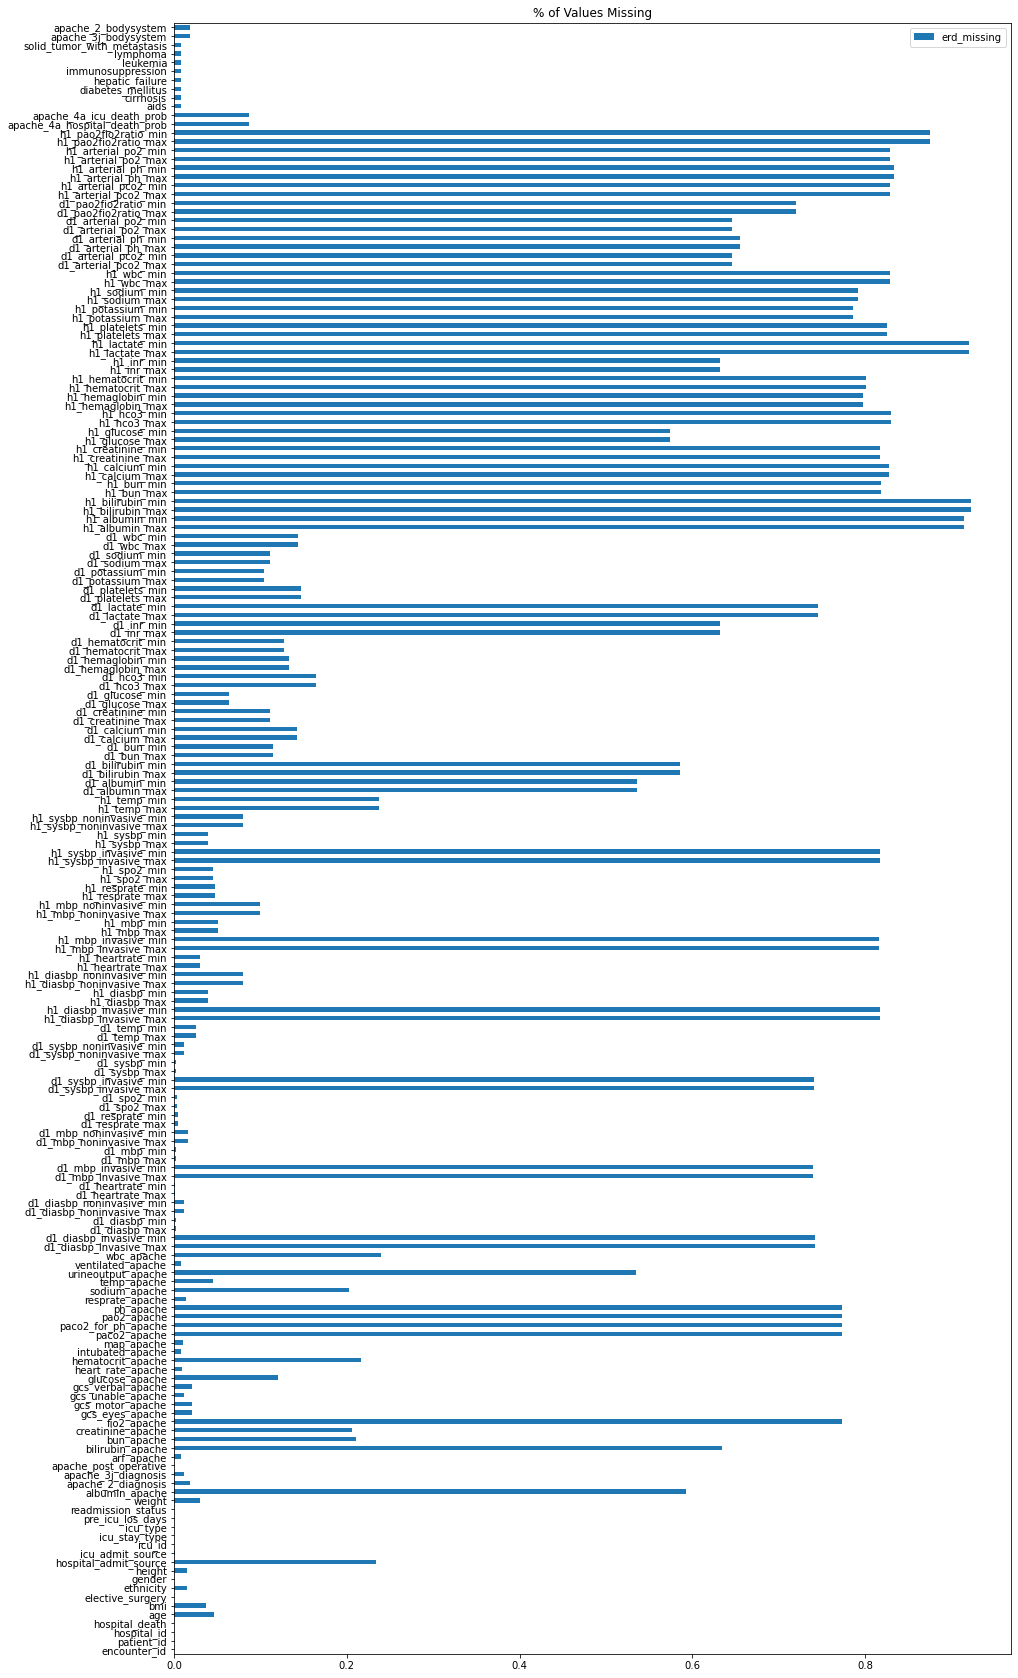

In [9]:
# Plotting columns by percentage of values that are null
missing_data = pd.DataFrame([database_erd.isna().mean()]).T
missing_data = missing_data.rename(columns={0: "erd_missing"})

missing_data.query("erd_missing >= 0").plot(kind="barh", figsize=(15, 30), title="% of Values Missing")
plt.show()

In [10]:
# Dropping unique identifier columns, height, weight and APACHE diagnosis (II, III, IV)
database_final = database_erd.drop(['height', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob'], axis=1)

In [11]:
# Counting columns with more than 5000 missing values
missing_value_fields = database_final.isnull().sum(axis=0).sort_values(ascending=False)[database_final.isnull().sum(axis=0).sort_values(ascending=False) > 5000]

print("\nTotal features with more than", 5000, "missing values:", len(missing_value_fields))


Total features with more than 5000 missing values: 111


In [12]:
# Dropping columns with more than 5000 missing values
database_final.drop(missing_value_fields.index.tolist(), axis=1, inplace = True)

In [13]:
database_final

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,Accident & Emergency,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [14]:
# Checking missing values again
database_final.isnull().sum(axis=0).sort_values(ascending=False)

h1_mbp_max               4639
h1_mbp_min               4639
h1_resprate_max          4357
h1_resprate_min          4357
age                      4228
                         ... 
icu_type                    0
readmission_status          0
apache_post_operative       0
patient_id                  0
encounter_id                0
Length: 69, dtype: int64

In [15]:
# Identifying columns with 'object' data type
object_list = database_final.select_dtypes(include = "object").columns
print (object_list)

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')


In [16]:
# Encoding columns with 'object' data type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in object_list:
    database_final[feat] = le.fit_transform(database_final[feat].astype(str))

print (database_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 91713 non-null  int64  
 1   patient_id                   91713 non-null  int64  
 2   hospital_id                  91713 non-null  int64  
 3   hospital_death               91713 non-null  int64  
 4   age                          87485 non-null  float64
 5   bmi                          88284 non-null  float64
 6   elective_surgery             91713 non-null  int64  
 7   ethnicity                    91713 non-null  int64  
 8   gender                       91713 non-null  int64  
 9   icu_admit_source             91713 non-null  int64  
 10  icu_id                       91713 non-null  int64  
 11  icu_stay_type                91713 non-null  int64  
 12  icu_type                     91713 non-null  int64  
 13  pre_icu_los_days

In [17]:
database_final

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,2,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,114252,59342,81,0,77.0,27.420000,0,2,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,119783,50777,118,0,25.0,31.950000,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,79267,46918,118,0,81.0,22.640000,1,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,92056,34377,33,0,19.0,NaN,0,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,2,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,0
91709,66119,13486,121,0,56.0,47.179671,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
91710,8981,58179,195,0,48.0,27.236914,0,2,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3
91711,33776,120598,66,0,NaN,23.297481,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6


In [18]:
# Dropping rows(patients) with missing values in any column
database_patient = database_final.dropna()

In [19]:
database_patient

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,2,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,114252,59342,81,0,77.0,27.420000,0,2,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,119783,50777,118,0,25.0,31.950000,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,79267,46918,118,0,81.0,22.640000,1,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,33181,74489,83,0,67.0,27.560000,0,2,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91698,83806,68549,195,0,47.0,51.439842,1,2,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
91706,127138,59223,121,0,54.0,19.770448,0,4,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
91708,91592,78108,30,0,75.0,23.060250,0,2,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,0
91709,66119,13486,121,0,56.0,47.179671,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0


In [20]:
# Converting df to csv
database_patient.to_csv('database_patient.csv')